In [1]:
import random

import numpy as np
import matplotlib.pyplot as plt

In [2]:
def cost(y: list, h: list) -> float:
    res = 0
    for yi, hi in zip(y, h):
        res += (hi - yi) ** 2

    return res / (2 * len(y))

In [21]:
class LinearRegression:
    def __init__(self, lr: float = 0.001, thr: float = 0.00001, n_epochs: int = 100):
        self.lr = lr
        self.thr = thr
        self.n_epochs = n_epochs
        self.w = [random.uniform(-5, 5), random.uniform(-5, 5)]
        print(f"Init w: {self.w}")

    def predict(self, X: list) -> list:
        predict = []
        for xi in X:
            predict.append(self.w[0] * xi[0] + self.w[1] * xi[1])

        return predict

    def update_w(self, X: list, y: list):
        # wk = wk - lr / m * sum((h(xi) - yi) * xik)
        m = len(y)

        h = self.predict(X)

        sm0 = 0
        sm1 = 0
        for xi, hi, yi in zip(X, h, y):
            sm0 += (hi - yi) * xi[0]
            sm1 += (hi - yi) * xi[1]

        self.w[0] = self.w[0] - self.lr * sm0 / m
        self.w[1] = self.w[1] - self.lr * sm1 / m

    def fit(self, X: list, y: list):
        last_cost = 1000000

        for i in range(self.n_epochs):
            self.update_w(X, y)
            new_cost = cost(y, self.predict(X))
            print(f"{i}, {self.w}, {new_cost}")
            if last_cost - new_cost < self.thr:
                break
            last_cost = new_cost

In [56]:
X = [[0], [1], [2], [3], [3], [4], [5], [5], [6], [9], [9]]
for i in range(len(X)):
    X[i] = [1] + X[i]

y = [0, 1.2, 3, 2, 3.5, 4.6, 5.4, 8, 3, 10, 8]

linear_regression = LinearRegression(lr=0.05, n_epochs=1000, thr=0.0000001)
# linear_regression.fit(X, y)

Init w: [ 1.70804477 -4.26430361]


In [70]:
def cost(y: np.array, h: np.array) -> float:
    return np.mean((h - y) ** 2) / 2

class LinearRegression:
    def __init__(self, lr: float = 0.001, thr: float = 0.00001, n_epochs: int = 100):
        self.lr = lr
        self.thr = thr
        self.n_epochs = n_epochs
        self.w = np.array([random.uniform(-5, 5), random.uniform(-5, 5)])
        print(f"Init w: {self.w}")

    def predict(self, X: np.ndarray) -> list:
        return X @ self.w # (11, 2), (2,)

    def update_w(self, X: np.array, y: np.array):
        # wk = wk - lr / m * sum((h(xi) - yi) * xik)
        # w = w - lr / m * XT @ (w @ X - y)
        m = len(y)

        h = self.predict(X)

        self.w -= self.lr / m * X.T @ (h - y)

    def fit(self, X: np.array, y: np.array):
        last_cost = 1000000
        print(f"X.shape {X.shape}, y.shape {y.shape}")

        for i in range(self.n_epochs):
            self.update_w(X, y)
            new_cost = cost(y, self.predict(X))
            print(f"{i}, {self.w}, {new_cost}")
            if last_cost - new_cost < self.thr:
                break
            last_cost = new_cost

In [71]:
X = [[0], [1], [2], [3], [3], [4], [5], [5], [6], [9], [9]]
for i in range(len(X)):
    X[i] = [1] + X[i]

X = np.array(X)

y = np.array([0, 1.2, 3, 2, 3.5, 4.6, 5.4, 8, 3, 10, 8])

linear_regression = LinearRegression(lr=0.05, n_epochs=1000, thr=0.0000001)
linear_regression.fit(X, y)

Init w: [1.58234773 2.87485928]
X.shape (11, 2), y.shape (11,)
0, [1.1104195  0.10051857], 7.940480268785509
1, [1.25478774 1.04625245], 1.8971968841541489
2, [1.18989442 0.72739119], 1.1964046677006204
3, [1.19636613 0.83836251], 1.1130138277898716
4, [1.17880674 0.80318411], 1.1010342736846779
5, [1.16964071 0.81764885], 1.0973743700300747
6, [1.15784278 0.81520188], 1.0947418526589372
7, [1.14715751 0.81846756], 1.0922921777539754
8, [1.13630884 0.81975577], 1.089925896494095
9, [1.12572739 0.82168113], 1.0876297104078974
10, [1.11526369 0.82335535], 1.0854003282123224
11, [1.1049655 0.8250809], 1.0832356658859188
12, [1.09481358 0.82675546], 1.081133828352222
13, [1.0848115 0.8284143], 1.0790929903774502
14, [1.07495515 0.83004591], 1.0771113814147948
15, [1.06524303 0.83165469], 1.0751872825002673
16, [1.05567284 0.83323961], 1.0733190245803703
17, [1.04624255 0.83480147], 1.0715049870433442
18, [1.03695011 0.83634046], 1.0697435963109598
19, [1.02779351 0.83785697], 1.06803332447

In [83]:
def predict(w0, w1, x):
    return w0 + w1 * x

In [81]:
X = np.array([[0], [1], [2], [3], [3], [4], [5], [5], [6], [9], [9]])

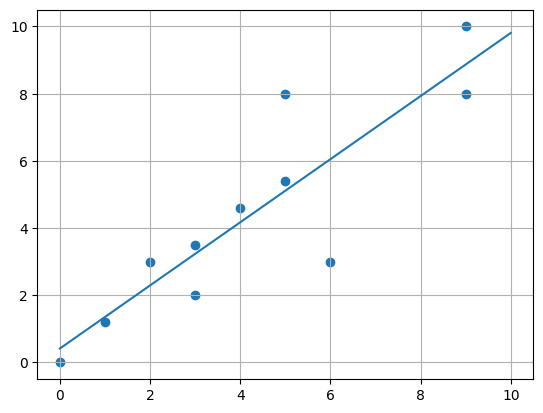

In [86]:
plt.scatter(X.reshape(-1), y)

plt.plot([0, 10], [predict(0.41526502, 0.93930325, i) for i in [0, 10]])
plt.grid()

In [94]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler



In [92]:
X

array([[0],
       [1],
       [2],
       [3],
       [3],
       [4],
       [5],
       [5],
       [6],
       [9],
       [9]])

In [95]:
scaler = MinMaxScaler()
X_scale = scaler.fit_transform(X)
X_scale

array([[0.        ],
       [0.11111111],
       [0.22222222],
       [0.33333333],
       [0.33333333],
       [0.44444444],
       [0.55555556],
       [0.55555556],
       [0.66666667],
       [1.        ],
       [1.        ]])

In [96]:
linear_regression = LinearRegression()

linear_regression.fit(X_scale, y)

cost(y, linear_regression.predict(X_scale))

1.0108131952435746

In [97]:
linear_regression.intercept_, linear_regression.coef_

(0.41054852320675206, array([8.46075949]))

In [99]:
from sklearn.pipeline import Pipeline

In [100]:
pipeline = Pipeline([("scaler", MinMaxScaler()), ("model", LinearRegression())])

In [102]:
pipeline.fit(X, y)

Pipeline(steps=[('scaler', MinMaxScaler()), ('model', LinearRegression())])

In [103]:
pipeline.predict(X)

array([0.41054852, 1.35063291, 2.2907173 , 3.23080169, 3.23080169,
       4.17088608, 5.11097046, 5.11097046, 6.05105485, 8.87130802,
       8.87130802])

In [104]:
y

array([ 0. ,  1.2,  3. ,  2. ,  3.5,  4.6,  5.4,  8. ,  3. , 10. ,  8. ])